<span style="font-family: 'Avenir'; font-size: 18px; line-height: 1.5;">

**CopperMap:** Enhancing Success in Ullmann Couplings

</span>

<span style="font-family: 'Avenir'; font-size: 18px; line-height: 1.5;">    
    
For comprehensive details about the experimental, computational, and modeling aspects, please refer to our manuscript on [ChemRxiv](https://chemrxiv.org/engage/chemrxiv/article-details/6532eb5cc3693ca993c1ce40).

</span>


<span style="font-family: 'Avenir'; font-size: 15px; line-height: 1.5;">  
    
M. Samha,# L. Karas,# D. Vogt, E. Odogwu, J. Elward, J. Crawford, J. Steves, M. Sigman. Predicting Success in Cu-Catalyzed C–N Coupling Reactions using Data Science. ChemRxiv, 2023. DOI: 10.26434/chemrxiv-2023-f50w6.

</span>

<span style="font-family: 'Avenir'; font-size: 18px; line-height: 1.5;">  
    
**Key Features:**
- **Target Reaction:** CopperMap was trained for predicting combinations of primary amines and aryl-bromides in Ullmann couplings.
- **Average Accuracy:** CopperMap achieved an average accuracy of 89% in predicting on/off reactivity (below or above 20% yield) using a dataset of approximately 1000 data points.
- **Library Composition:** The compound library includes 497 primary amines and 385 aryl-bromides.
- **Customization:** If your desired substrate is not in the library, consider simplifying the search by focusing on the amine or aryl-bromide core only.

</span>

<span style="font-family: 'Avenir'; font-size: 18px; line-height: 1.5;">    

Developed by [The Sigman Lab](https://www.sigmanlab.com).
Developer: Lucas Karas 
</span>

# IMPORTS

In [1]:
from helper_functions import (
    load_pickle,
    plot_confidence_contour,
    convert_to_isomeric_smiles,
    get_input,
    display_structure,
    normalize_and_stack,
    get_confidence_prediction,
    get_nearest_neighbors,
    display_ligands_info,
    get_ligands_info,
    print_product_info,
    draw_reaction_image,
    loaded_x_values,
    loaded_y_values,
    confidence_model,
    knn_model,
    best_ligands,
    x_grid,
    y_grid,
    training_dict,
    br_df,
    amine_df,
    ligands_df,
    ligands
)

# PREDICTION TOOL

-----------------------------------------------------------------------------------
-                          ~ CopperMap Prediction Tool ~                          -
-----------------------------------------------------------------------------------
Enter SMILES string of a primary amine in the library: NC1=CC=CC=C1
The value for the entered compound: -0.79202
Enter SMILES string of a aryl-bromide in the library: BrC1=CC=CC=C1
The value for the entered compound: 30.5476

Entered substrates and expected product:


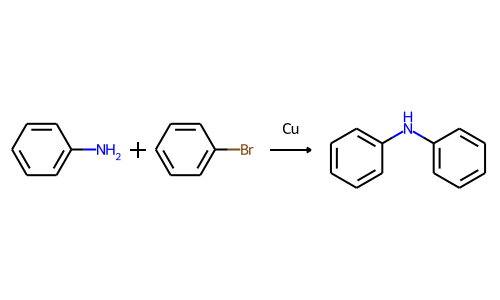

Predicted yield for this reaction is <20% with 95.0% confidence.


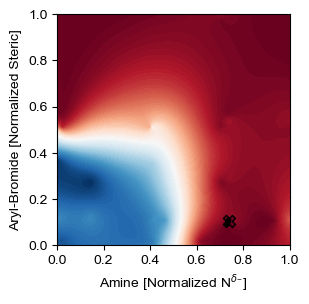

-----------------------------------------------------------------------------------
-                      ~ CopperMap Ligand Suggestion Tool ~                       -
-----------------------------------------------------------------------------------

The nearest known product is P110. Best ligands for this product are:
L30 [17.7% yield], L28 [16.8% yield], and L26 [14.1% yield].

The second nearest known product is P118. Best ligands for this product are:
L28 [8.1% yield], L26 [6.7% yield], and L32 [5.4% yield].

Based on that, here are the ligands we suggest trying for this reaction:


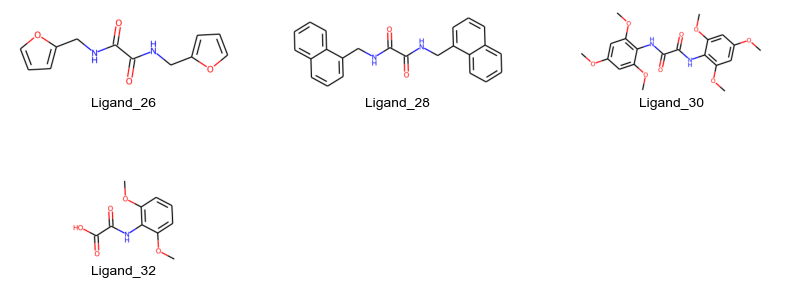

Here are PubChem links for those ligands:
L26: https://pubchem.ncbi.nlm.nih.gov/compound/330826
L28: https://pubchem.ncbi.nlm.nih.gov/compound/145722499
L30: https://pubchem.ncbi.nlm.nih.gov/compound/126500457
L32: https://pubchem.ncbi.nlm.nih.gov/compound/118864503


In [3]:
print(f"-----------------------------------------------------------------------------------")
print(f"-                          ~ CopperMap Prediction Tool ~                          -")
print(f"-----------------------------------------------------------------------------------")

# # INPUT SMILES FOR PRIMARY AMINE AND ARYL-BROMIDE:

# Primary amine input loop:
amine_smiles, amine_pred = get_input("primary amine", amine_df, 'N𝛿–')
# Display and retrieve information for primary amine:
# display_structure("primary amine", amine_smiles, amine_df) #uncomment if you want to plot the structure

# Aryl-bromide input loop:
br_smiles, br_pred = get_input("aryl-bromide", br_df, 'Steric')
# Display and retrieve information for aryl-bromide:
# display_structure("aryl-bromide", br_smiles, br_df) #uncomment if you want to plot the structure

print(f"\nEntered substrates and expected product:")
draw_reaction_image(amine_smiles, br_smiles)

# PREDICT THE YIELD OUTCOME, CONFIDENCE LEVEL, AND TOP LIGANDS

# Normalize and stack input data
x_target_norm, y_target_norm, input_data = normalize_and_stack(amine_pred, br_pred, loaded_x_values, loaded_y_values)

# Get confidence prediction
confidence_pred, message = get_confidence_prediction(x_target_norm, y_target_norm, confidence_model)

# # Get nearest neighbors and ligand information
P1, P1_info, P2, P2_info = get_nearest_neighbors(input_data, knn_model, training_dict)

# # Plot confidence contour
plot_confidence_contour(x_grid, y_grid, input_data, confidence_pred, P1_info, P2_info)

print(f"-----------------------------------------------------------------------------------")
print(f"-                      ~ CopperMap Ligand Suggestion Tool ~                       -")
print(f"-----------------------------------------------------------------------------------")

ligands_P1_info = get_ligands_info(P1_info)
ligands_P2_info = get_ligands_info(P2_info)

print_product_info(P1, ligands_P1_info, 1)
# draw_reaction_image(training_dict[P1]['am_smiles'], training_dict[P1]['arbr_smiles']) #uncomment if you want to see the neighbor structure
print_product_info(P2, ligands_P2_info, 2)
# draw_reaction_image(training_dict[P2]['am_smiles'], training_dict[P2]['arbr_smiles']) #uncomment if you want to see the neighbor structure

#Display information on top ligands 
print(f"\nBased on that, here are the ligands we suggest trying for this reaction:")
display_ligands_info(P1, P1_info, P2_info, ligands)
ligands_P1_info = get_ligands_info(P1_info)
ligands_P2_info = get_ligands_info(P2_info)

# amine_smiles = "NC1=CC=CC=C1" 
# br_smiles = "BrC1=CC=CC=C1"